In [4]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from scipy import stats

from itertools import combinations 
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Define the function to create an Akaike Information Criterion (AIC) model from data for model selection
def AIC(train_data, train_label):
    from sklearn import linear_model
    linear_model = linear_model.LinearRegression().fit(train_data, train_label)
    predict_label = linear_model.predict(train_data)
    degree_freedom = train_data.shape[1]
    sample_size = train_data.shape[0]
    SSE = np.dot((train_label - predict_label), (train_label - predict_label))
    return sample_size * np.log(SSE/sample_size) + 2 * degree_freedom

In [8]:
# Define the function to create a Bayesian Information Criterion (BIC) model from data for model selection
def BIC(train_data, train_label):
    from sklearn import linear_model
    linear_model = linear_model.LinearRegression().fit(train_data, train_label)
    predict_label = linear_model.predict(train_data)
    degree_freedom = train_data.shape[1]
    sample_size = train_data.shape[0]
    SSE = np.dot((train_label - predict_label), (train_label - predict_label))
    return sample_size * np.log(SSE/sample_size) + np.log(sample_size) * degree_freedom

In [10]:
# Import the "US_House_Price.csv" dataset and view the first data rows
HouseData = pd.read_csv('US_House_Price.csv')
HouseData.head()

,DATE,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index
0,2003-01-01,1808,144.4,1.97,14614.141,76,25.93,10710.4,1.24,5.9160,1654,111278.0,1.5,5.8,79.583,128.461
1,2003-02-01,1854,145.2,1.97,14614.141,82,25.93,10674.0,1.26,5.8425,1688,111278.0,-0.1,5.9,79.583,129.355
2,2003-03-01,1757,145.2,1.97,14614.141,98,25.93,10696.5,1.25,5.7450,1638,111278.0,-1.1,5.9,79.583,130.148
3,2003-04-01,1803,145.9,1.83,14743.567,91,25.93,10752.7,1.26,5.8125,1662,111278.0,1.7,6.0,79.583,130.884
4,2003-05-01,1835,145.8,1.83,14743.567,101,25.93,10832.0,1.26,5.4840,1733,111278.0,0.2,6.1,79.583,131.735


In [12]:
# Prints a summary of the testing dataset
HouseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    240 non-null    object 
 1   building_permits        240 non-null    int64  
 2   const_price_index       240 non-null    float64
 3   delinquency_rate        240 non-null    float64
 4   GDP                     240 non-null    float64
 5   house_for_sale_or_sold  240 non-null    int64  
 6   housing_subsidies       240 non-null    float64
 7   income                  240 non-null    float64
 8   interest_rate           240 non-null    float64
 9   mortgage_rate           240 non-null    float64
 10  construction_unit       240 non-null    int64  
 11  total_houses            240 non-null    float64
 12  total_const_spending    240 non-null    float64
 13  unemployment_rate       240 non-null    float64
 14  urban_population        240 non-null    fl

In [14]:
# Creates "Date Index" column for better data comparisons to other variables
rows,columns = HouseData.shape
HouseData.insert(1, 'Date Index', range(1,rows+1))

In [16]:
# Review dataset
HouseData.head()

,DATE,Date Index,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index
0,2003-01-01,1,1808,144.4,1.97,14614.141,76,25.93,10710.4,1.24,5.9160,1654,111278.0,1.5,5.8,79.583,128.461
1,2003-02-01,2,1854,145.2,1.97,14614.141,82,25.93,10674.0,1.26,5.8425,1688,111278.0,-0.1,5.9,79.583,129.355
2,2003-03-01,3,1757,145.2,1.97,14614.141,98,25.93,10696.5,1.25,5.7450,1638,111278.0,-1.1,5.9,79.583,130.148
3,2003-04-01,4,1803,145.9,1.83,14743.567,91,25.93,10752.7,1.26,5.8125,1662,111278.0,1.7,6.0,79.583,130.884
4,2003-05-01,5,1835,145.8,1.83,14743.567,101,25.93,10832.0,1.26,5.4840,1733,111278.0,0.2,6.1,79.583,131.735


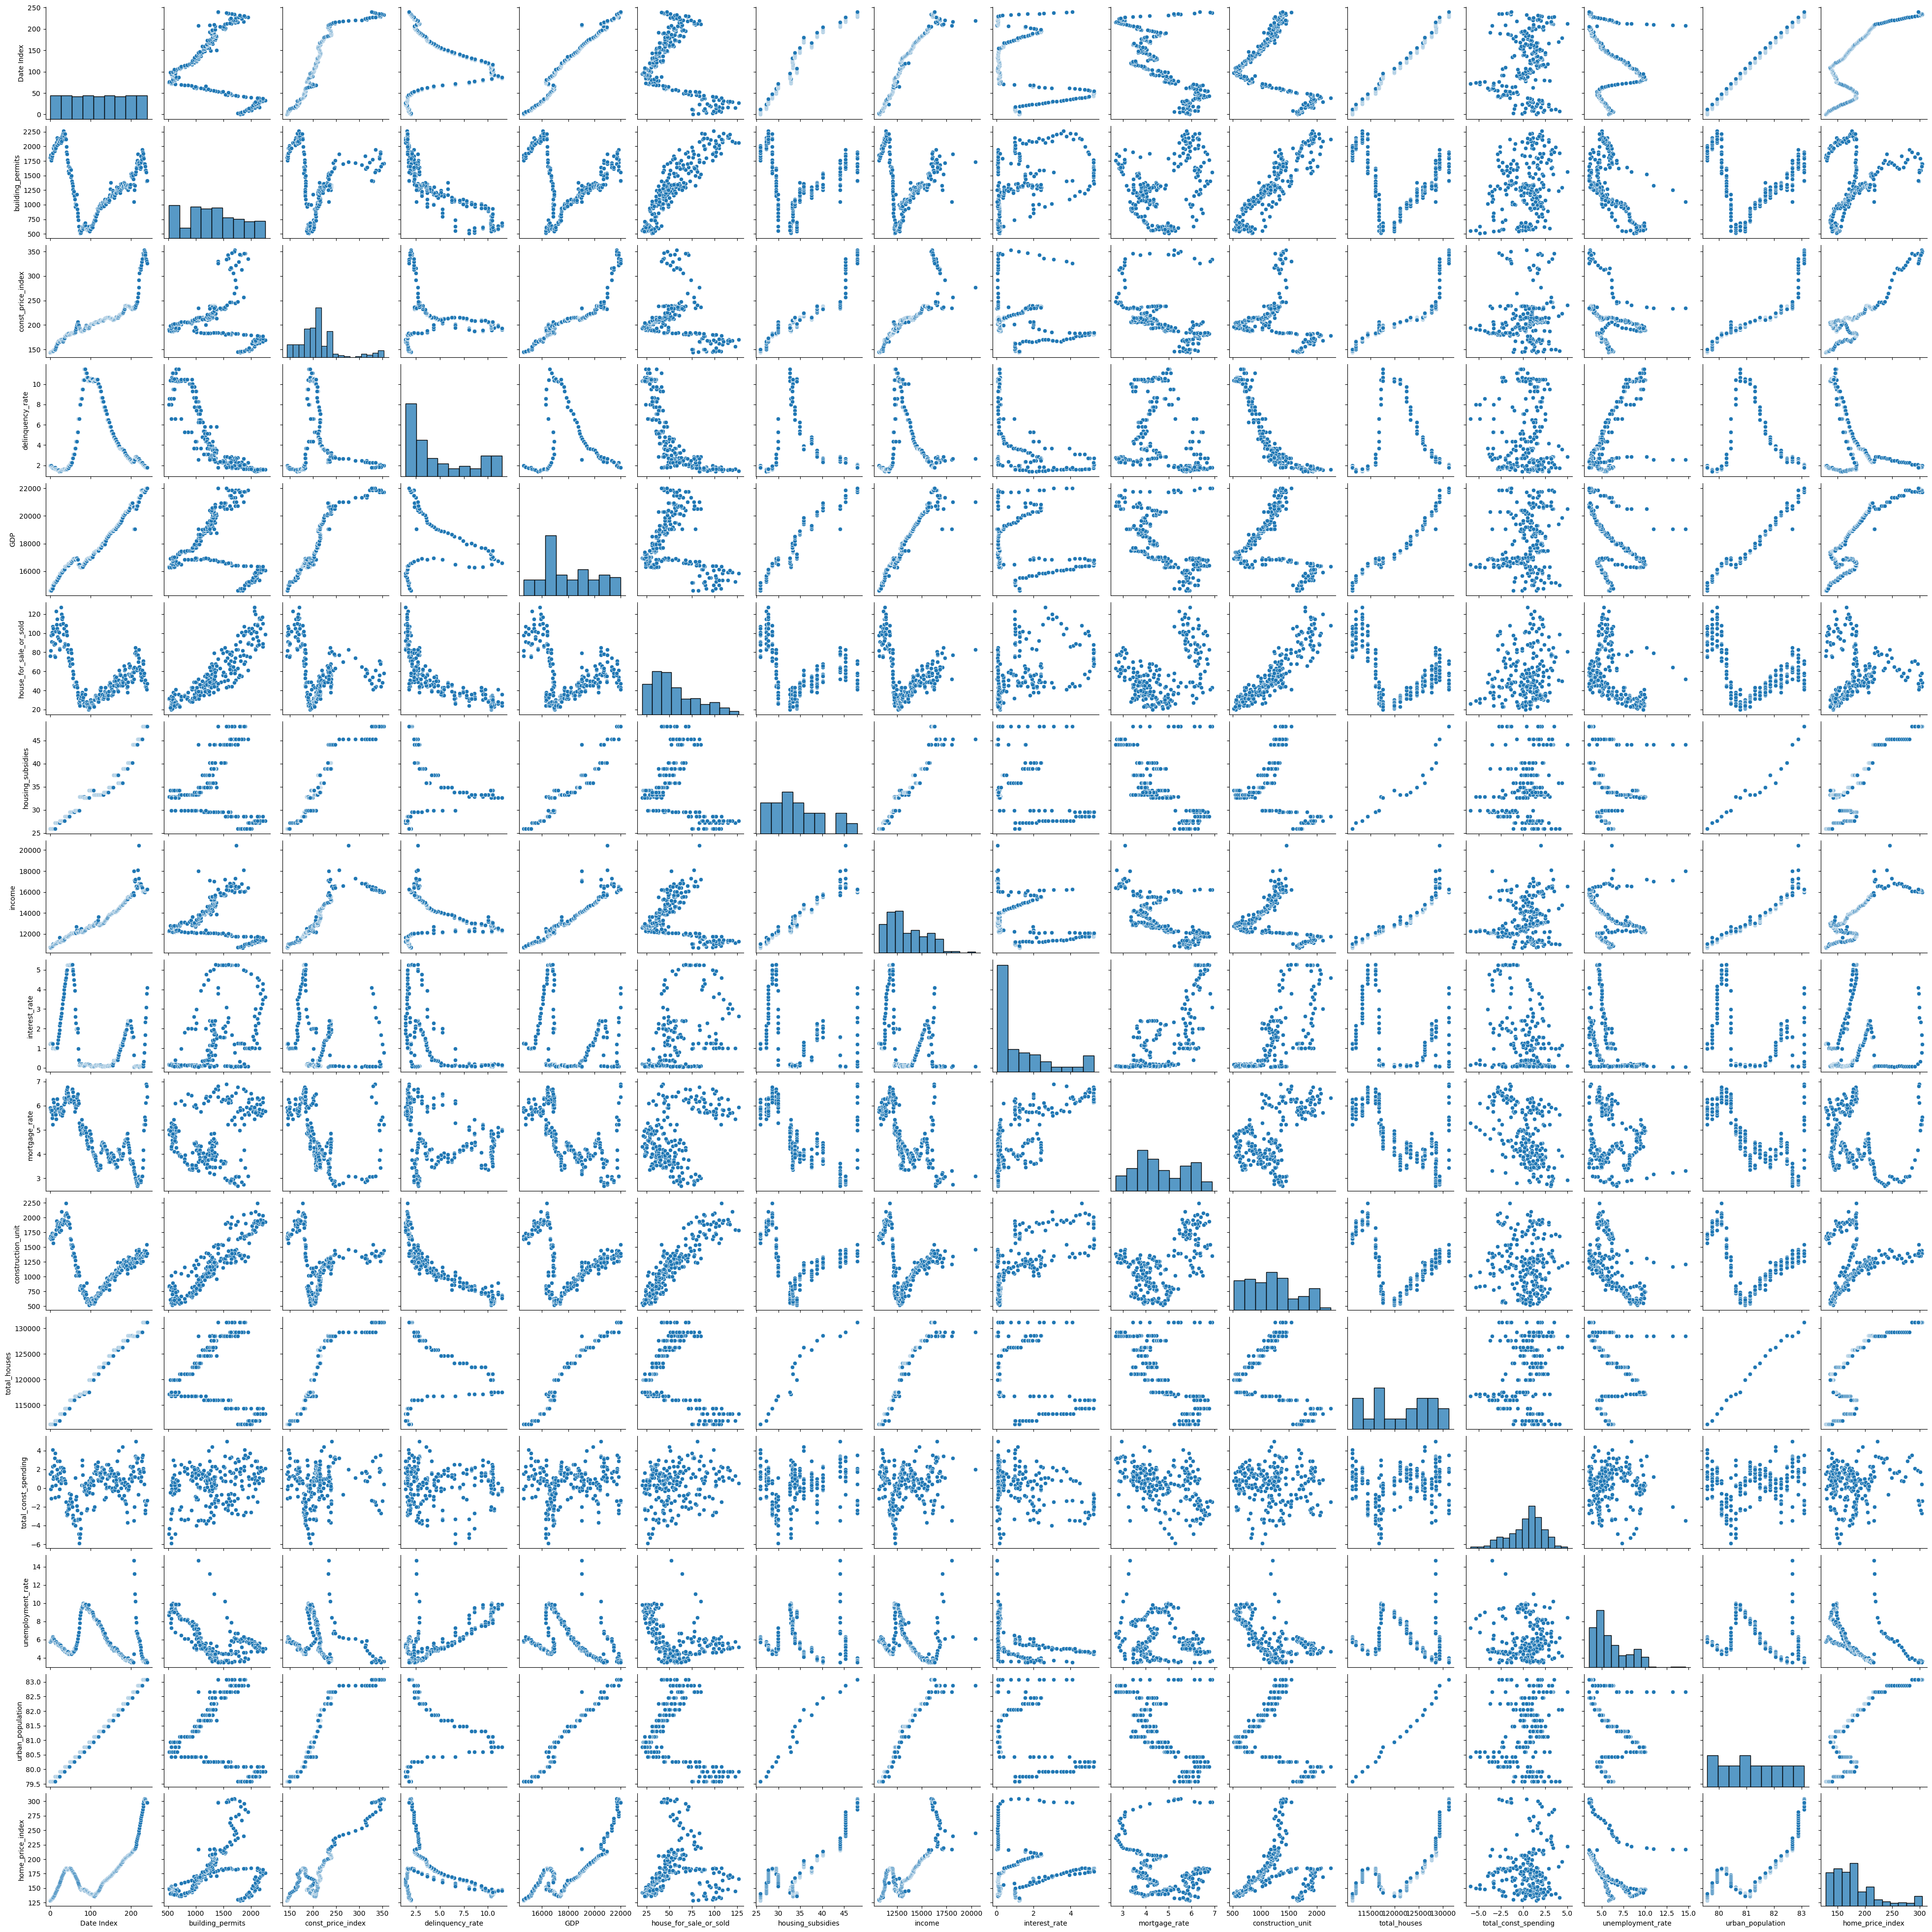

In [18]:
# Create the pairplot function using seaborn
sns.pairplot(HouseData)

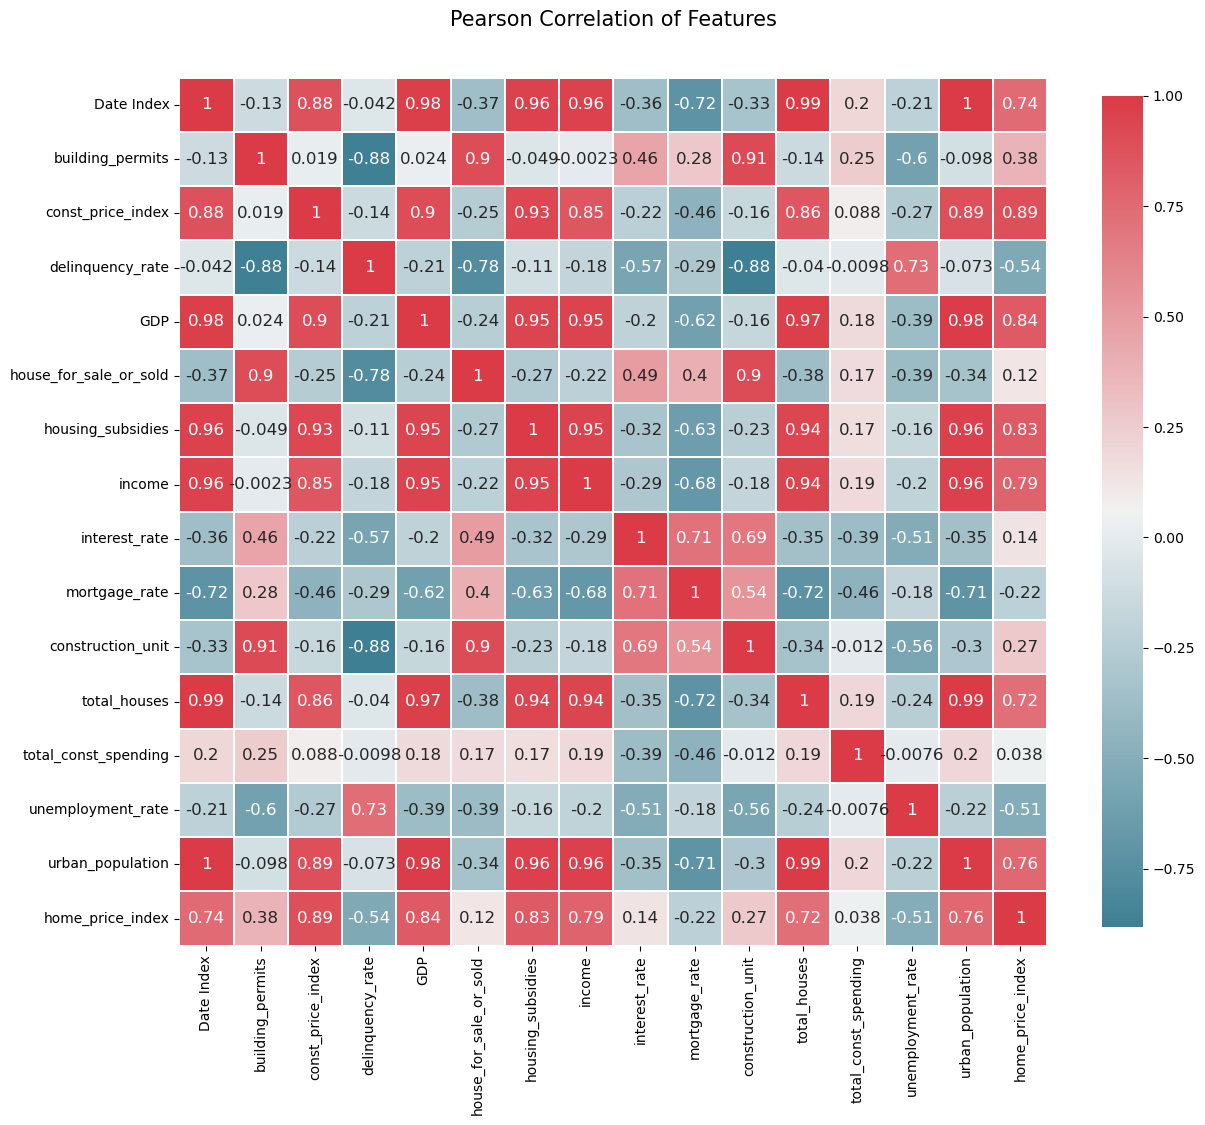

In [19]:
# Create a heatmap to evaluate collinearity between inputs
def correlation_heatmap(data):
    _ , ax = plt.subplots(figsize =(14, 12)) 
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    sns.heatmap(
        data.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.show()
    
correlation_heatmap(HouseData.iloc[:,1:])

In [20]:
# Create input (x) data
x_data = HouseData.iloc[:, 1:-1]
x_data.tail()

,Date Index,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population
235,236,1586,342.753,1.85,21851.134,51,48.021,16161.4,2.33,5.2225,1355,131202.0,-2.4,3.7,83.084
236,237,1588,336.464,1.85,21851.134,44,48.021,16184.9,2.56,6.1120,1438,131202.0,-1.8,3.5,83.084
237,238,1555,333.796,1.78,21989.981,43,48.021,16223.5,3.08,6.9000,1348,131202.0,-1.5,3.7,83.084
238,239,1402,330.369,1.78,21989.981,41,48.021,16229.6,3.78,6.8050,1543,131202.0,-1.4,3.6,83.084
239,240,1409,326.449,1.78,21989.981,47,48.021,16265.1,4.10,6.3640,1390,131202.0,-1.3,3.5,83.084


In [21]:
# Create output (y) data
y_data = HouseData['home_price_index']
y_data.head()

0    128.461
1    129.355
2    130.148
3    130.884
4    131.735
Name: home_price_index, dtype: float64

In [22]:
# Create a training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size = 0.2, random_state = 2023)

In [23]:
# View training input dataset size
x_train.shape 

(192, 15)

In [24]:
# Fit linear regression to data
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [25]:
# Display linear regression outputs
print('Intercept =', linear_regression.intercept_)
print('Coefficients =',linear_regression.coef_)
print('R^2 = %.2f' % linear_regression.score(x_train,y_train))

Intercept = -825.2938877760059
Coefficients = [ 1.75230201e-01  1.52275424e-03  5.90695830e-01 -3.03812071e+00
  2.10756160e-03 -6.41219101e-02  1.36720649e+00 -2.36641621e-03
  4.20257534e+00  9.85662443e-01  1.51227863e-02 -3.89341536e-03
  2.85709530e-02  1.48778842e+00  1.54706993e+01]
R^2 = 0.99


In [44]:
# Polynomial Regression
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(x_train)
poly.fit(x_train, y_train)
# Fit linear regression with transformed data
pr = linear_model.LinearRegression().fit(x_poly, y_train)
print('Coefficients: \n', pr.coef_)

Coefficients: 
 [-1.18460476e+05  4.06953094e+02 -1.40605534e+00  1.65309105e+02
 -3.77601077e+03 -1.47615885e+01  3.52829247e+01 -8.84553181e+02
 -4.61108552e+00  3.80720510e+02 -1.46487460e+03  7.06009808e+00
  4.38655900e-01  5.16913480e+02  3.43317674e+03  6.94000791e+02
  5.74081362e-02  8.28529850e-04  5.39530628e-02 -4.12818768e-01
 -4.32864961e-03  1.00383134e-02 -2.94988263e-01  1.20534874e-03
  4.35811869e-01 -3.67052025e-01  8.17472084e-05  7.51816542e-04
  1.17585298e-01  5.31370308e-01 -5.56874299e+00  1.58367509e-05
 -6.73952920e-04 -4.25898092e-03  6.78402029e-06 -3.77010992e-04
  3.76537174e-03 -1.65846105e-05  7.26496360e-03  3.32350785e-03
 -2.82793721e-05 -1.23658265e-05  2.63471659e-04  9.66559517e-03
  3.54149489e-02 -1.45973094e-03 -9.44674365e-02 -4.82726243e-04
  7.41116137e-03  7.02426570e-02 -1.61772790e-04  3.97253519e-03
 -1.45876890e-01 -1.70884111e-04 -2.24372099e-04  9.95084038e-03
 -2.23380233e-01 -1.62528945e+00 -9.63679462e-02  1.03329066e-02
  5.52756

In [45]:
# R^2 and Intercept Values
print('R^2: %.2f' % pr.score(x_poly, y_train))
print('Intercept =',pr.intercept_)

R^2: 1.00
Intercept = 201674.4732816536


In [26]:
# Ordinary Least Squares regression
import statsmodels.api as sm
lr = sm.OLS(y_train, x_train)
lr = lr.fit()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:       home_price_index   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.296e+04
Date:                Sat, 19 Jul 2025   Prob (F-statistic):                   2.49e-282
Time:                        21:26:11   Log-Likelihood:                         -550.60
No. Observations:                 192   AIC:                                      1131.
Df Residuals:                     177   BIC:                                      1180.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [27]:
# Train Error
y_pred_train = lr.predict(x_train)
train_mse = mean_squared_error(y_train, y_pred_train)
print("Train Error = %.3f" % train_mse)

Train Error = 18.129


In [28]:
# Test Error
y_pred_test = lr.predict(x_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Test Error = %.3f" % test_mse)

Test Error = 21.077


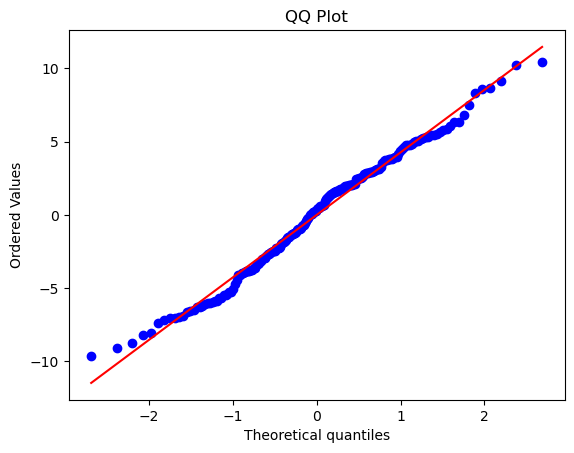

In [29]:
# Plot QQ plot to check the normality assumption
stats.probplot(y_train - linear_regression.predict(x_train), dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

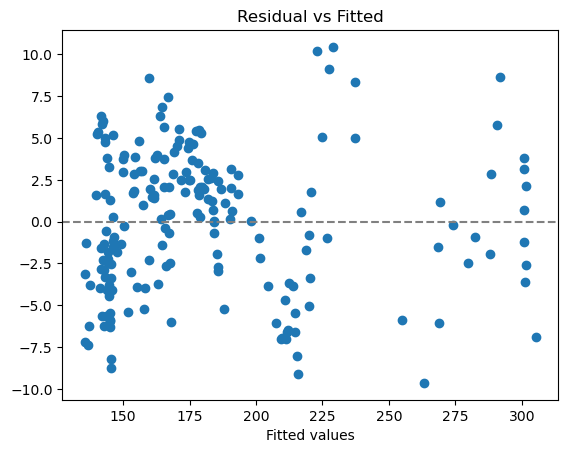

In [30]:
# Plot the Residual-Fitted plot to check the linear model assumption
residuals = y_train - linear_regression.predict(x_train)
plt.scatter(linear_regression.predict(x_train), residuals)
plt.xlabel('Fitted values')
plt.title('Residual vs Fitted')
plt.axhline(y = 0, color = 'grey', ls = '--')
plt.show()

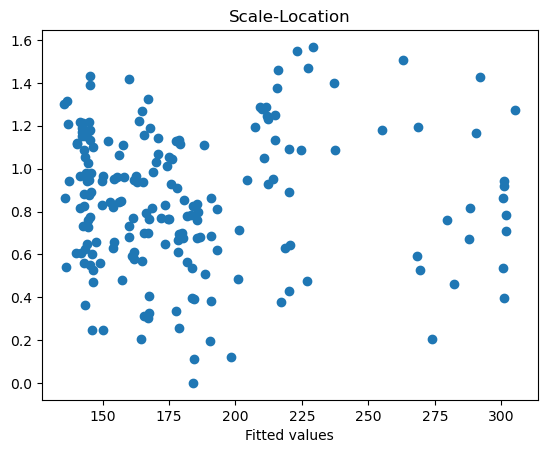

In [31]:
# Plot Scale-Location plot to check the equal variance assumption
standardized_residuals = (residuals - residuals.mean()) / residuals.std()
plt.scatter(linear_regression.predict(x_train), np.sqrt(abs(standardized_residuals)))
plt.xlabel('Fitted values')
plt.title('Scale-Location')
plt.show()

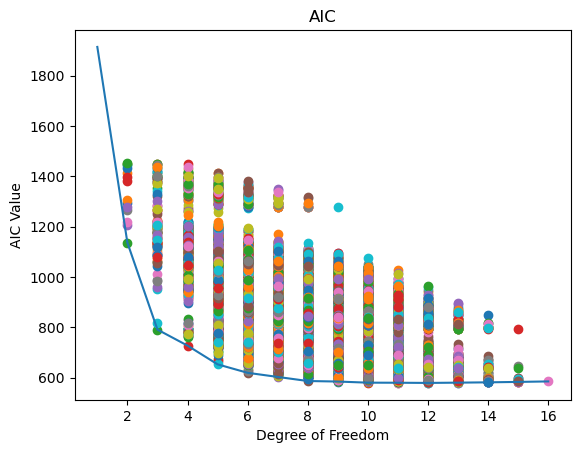

In [32]:
# Generate AIC values with models of every combination of inputs and plot them against degrees of freedom
feature_names = list(x_train.columns.values)
min_AIC = []
I_AIC = []
min_AIC.append(y_train.var())
# plt.scatter(1, y_data.var()) #when there is only the intercept term, plot variance
for i in range(1, 16):
    names = list(combinations(feature_names, i)) #generate the combination of i feature names and convert it to a list
    # print(names)
    aic_list = []    #define a list to store AIC values
    for each_element in names:
        aic_list.append(AIC(x_train[list(each_element)], y_train)) #append AIC values to the list
    m = np.min(aic_list)
    min_AIC.append(m)
    I = aic_list.index(m)
    I_AIC.append(I)
    # print(aic_list)
    for each_value in aic_list:
        plt.scatter(x = i + 1, y = each_value)   #plot AIC values

plt.plot(range(1,17), min_AIC)
plt.title('AIC') 
plt.xlabel('Degree of Freedom')
plt.ylabel('AIC Value')
plt.show()

In [33]:
# Look at minimum AIC values and find the number of predictors used for the lowest AIC model
print('The minimum AICs are:',min_AIC)
Low_AIC = np.min(min_AIC)
print(Low_AIC)
Index = min_AIC.index(Low_AIC)
print(Index)

The minimum AICs are: [1914.7670453559929, 1136.4221186231955, 790.7070224525692, 727.016142882938, 652.5429342490058, 618.8203499609872, 602.4456742343755, 586.2230318517154, 584.1033966911436, 579.6380066712883, 579.355446072075, 578.6201361766557, 579.69180480163, 580.9833665277433, 582.6219802273346, 584.6085896531426]
578.6201361766557
11


In [34]:
# Find the model with the lowest AIC
names = list(combinations(feature_names, Index))
names[I_AIC[Index-1]]

('Date Index',
 'const_price_index',
 'delinquency_rate',
 'house_for_sale_or_sold',
 'housing_subsidies',
 'income',
 'interest_rate',
 'construction_unit',
 'total_houses',
 'unemployment_rate',
 'urban_population')

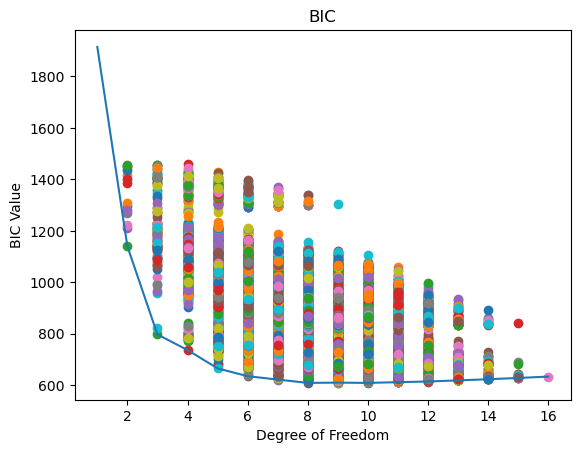

In [35]:
# Generate BIC values with models of every combination of inputs and plot them against degrees of freedom
feature_names = list(x_train.columns.values)
min_BIC = []
I_BIC = []
min_BIC.append(y_train.var())
# plt.scatter(1, y_train.var()) #when there is only the intercept term, plot variance
for i in range(1, 16):
    names = list(combinations(feature_names, i)) #generate the combination of i feature names and convert it to a list
    # print(names)
    bic_list = []  #define a list to store BIC values
    for each_element in names:
        bic_list.append(BIC(x_train[list(each_element)], y_train))  #append BIC values to the list
    # print(bic_list)
    m = np.min(bic_list)
    min_BIC.append(m)
    I = bic_list.index(m)
    I_BIC.append(I)
    for each_value in bic_list:
        plt.scatter(x = i + 1, y = each_value) #plot BIC values
        
plt.plot(range(1,17), min_BIC)
plt.title('BIC')
plt.xlabel('Degree of Freedom')
plt.ylabel('BIC Value')
plt.show()

In [36]:
# Look at the minimum BIC values and find the number of predictors used for the lowest BIC model
print('The minimum BICs are:',min_BIC)
Low_BIC = np.min(min_BIC)
print(Low_BIC)
Index = min_BIC.index(Low_BIC)
print(Index)

The minimum BICs are: [1914.7670453559929, 1139.6796139952232, 797.2220131966247, 736.7886289990213, 665.572915737117, 635.1078268211261, 621.9906464665422, 609.0254994559099, 610.1633596673659, 608.9554650195383, 611.9303997923528, 614.4525852689613, 618.7817492659634, 623.3308063641045, 628.2269154357235, 633.4710202335593]
608.9554650195383
9


In [37]:
# Find the model with the lowest BIC
names = list(combinations(feature_names, Index))
names[I_BIC[Index-1]]

('Date Index',
 'const_price_index',
 'delinquency_rate',
 'housing_subsidies',
 'income',
 'interest_rate',
 'construction_unit',
 'total_houses',
 'unemployment_rate')

In [38]:
# Sample 200 samples from -5 to 3 in an equal space in log space that is 10^(-5) to 10^(-3)
n_alphas_ridge = 200
alphas_ridge = np.logspace(-5, 3, n_alphas_ridge)

#Fit ridge regression with penalty of alphas_ridge
model_ridge = linear_model.RidgeCV(alphas=alphas_ridge, store_cv_values=True).fit(x_train, y_train)
print('The penalty should be: %f'%model_ridge.alpha_)

The penalty should be: 24.658111


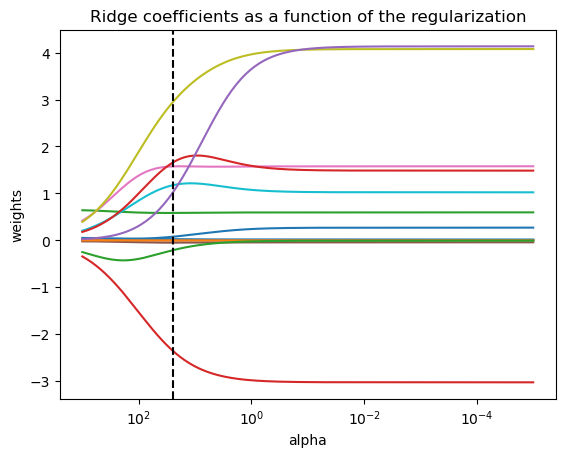

In [39]:
# Conduct Ridge regression to find optimal model using proportional shrinkage
n_alphas_ridge = 200
# Sample 200 samples from -5 to 3 in an equal space in log space that is 10^(-5) to 10^(-3)
alphas_ridge = np.logspace(-5, 3, n_alphas_ridge)

coefs_ridge = []
for a_ridge in alphas_ridge:
    ridge = linear_model.Ridge(alpha=a_ridge, fit_intercept=False)
    ridge.fit(x_train, y_train)
    
    #append coefficient to the list 'coefs_ridge'
    coefs_ridge.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas_ridge, coefs_ridge)
#vertical dashed line with black color, indicating the best alpha value
ax.axvline(model_ridge.alpha_, color = 'k', linestyle='--')
ax.set_xscale('log')
# reverse axis
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [40]:
# Display Ridge regression outputs
print("Optimal Alpha:", model_ridge.alpha_)
print("Coefficients:", model_ridge.coef_)
print("Intercept:", model_ridge.intercept_)

Optimal Alpha: 24.658110758226037
Coefficients: [ 2.34896337e-01 -3.61638040e-04  5.87280304e-01 -2.43772265e+00
  3.52240022e-03 -3.41655786e-02  1.60665356e+00 -1.45816133e-03
  3.18372573e+00  1.09718389e+00  2.11651062e-02 -2.75082942e-03
 -2.06598537e-01  1.19240887e+00  1.38943037e-01]
Intercept: 222.6120593471985


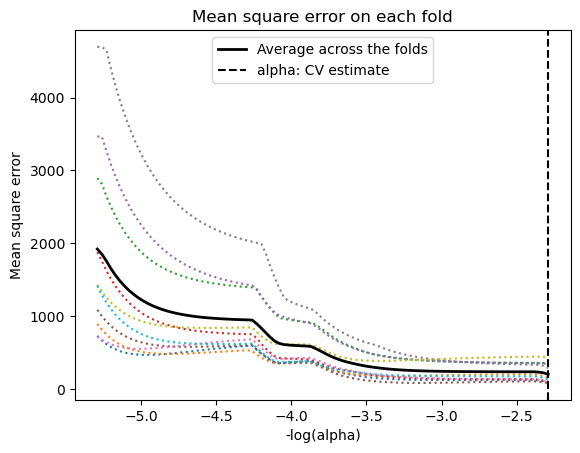

In [41]:
# Computing the regularization path using the Lars LASSO
# 10-fold cross validation
# Fit lasso regression
model = linear_model.LassoCV(cv=10).fit(x_train, y_train)

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',label='Average across the folds', linewidth=2)
#vertical dashed line with black color, indicating the best alpha value
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold')
plt.axis('tight')
plt.show()

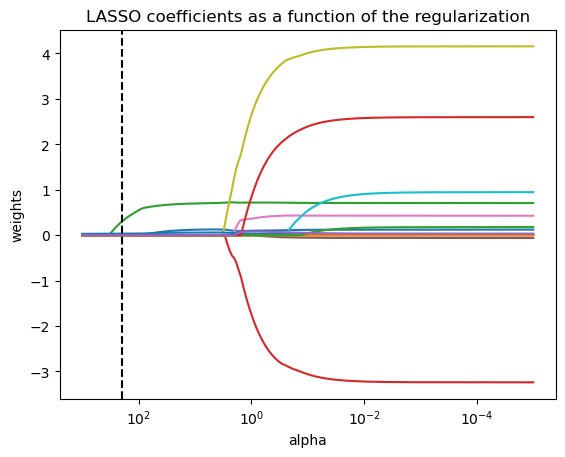

In [42]:
# Conduct LASSO regression to find the optimal model using the removal of nonessential coefficients
n_alphas_lasso = 200
#sample 200 samples from -5 to 3 in an equal space in log space that is 10^(-5) to 10^(-3)
alphas_lasso = np.logspace(-5, 3, n_alphas_lasso) 

coefs_lasso = []
for a_lasso in alphas_lasso:
    #fit lasso regression with penalty of a_lasso
    lasso = linear_model.Lasso(alpha=a_lasso, fit_intercept=False)
    lasso.fit(x_train, y_train)
    coefs_lasso.append(lasso.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas_lasso, coefs_lasso)
ax.set_xscale('log')
# reverse axis
ax.set_xlim(ax.get_xlim()[::-1])  
#vertical dashed line with black color, indicating the best alpha value
ax.axvline(model.alpha_, color = 'k', linestyle='--')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('LASSO coefficients as a function of the regularization')
plt.axis('tight')
plt.show()
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Display LASSO regression outputs
print("Optimal Alpha:", model.alpha_)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Optimal Alpha: 195.38423572729494
Coefficients: [ 0.         -0.          0.09673175 -0.          0.02925513 -0.
  0.          0.00234531  0.          0.          0.02826026 -0.0048361
 -0.          0.          0.        ]
Intercept: 152.96882768028303
